# FB Prophet weather forecasting Model 

In [1]:
#Import the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Import the dataset:

In [26]:
#Read the dataset:
df = pd.read_csv('DailyDelhiClimateTrain.csv')
#Check the five rows of data:
df.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [4]:
#describe the data:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<Axes: xlabel='date', ylabel='meantemp'>

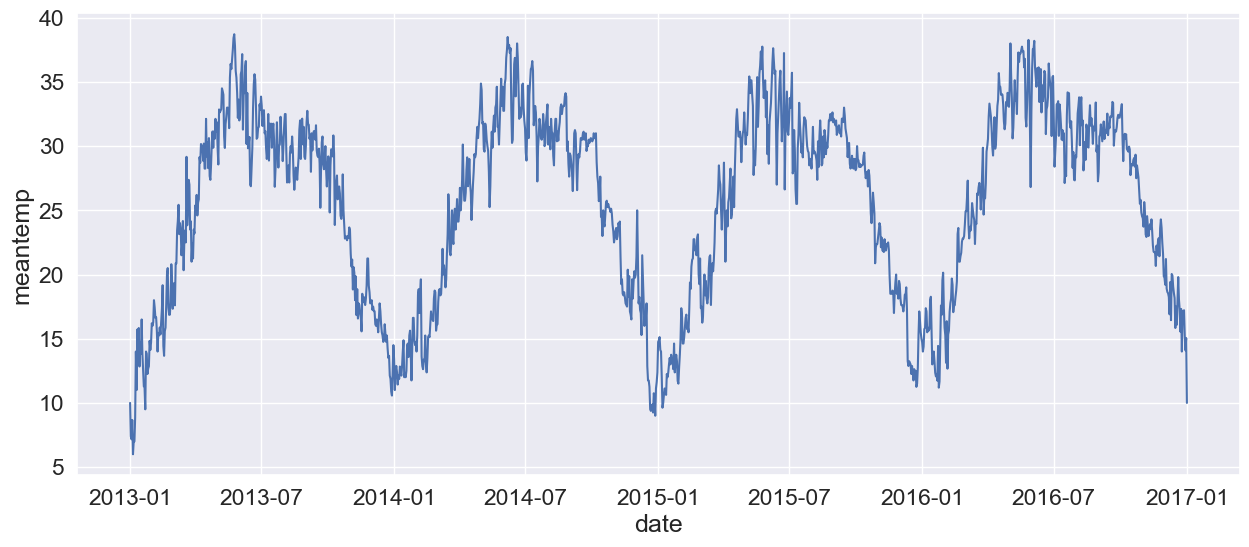

In [5]:
#Draw a line plot:
sns.set(rc={'figure.figsize':(15, 6)}, font_scale=1.5, style='darkgrid')
sns.lineplot(data=df, x='date', y='meantemp')

In [6]:
# Assuming 'df' is your DataFrame

fig = px.line(df, x=df.index, y='meantemp', color_discrete_sequence=['blue'])  # Set color for 'meantemp'

# Add the second line plot for 'humidity' with a different color
fig.add_trace(px.line(df, x=df.index, y='humidity', color_discrete_sequence=['red']).data[0])
fig.add_trace(px.line(df, x=df.index, y='wind_speed', color_discrete_sequence=['green']).data[0])

fig.show()

In [7]:
#Define the correlation using pearso correlation between humdity and meantemp:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['humidity'], df['meantemp'])
print(corr)

-0.571950715581722


In [8]:
# Create the scatter plot with color based on 'humidity'
fig = px.scatter(df, x='meantemp', y='humidity', 
                 trendline='ols', trendline_color_override='red')

fig.update_layout(title='Scatter plot between meantemp and humidity',
                  xaxis_title='Mean Temperature',
                  yaxis_title='Humidity')

fig.show()

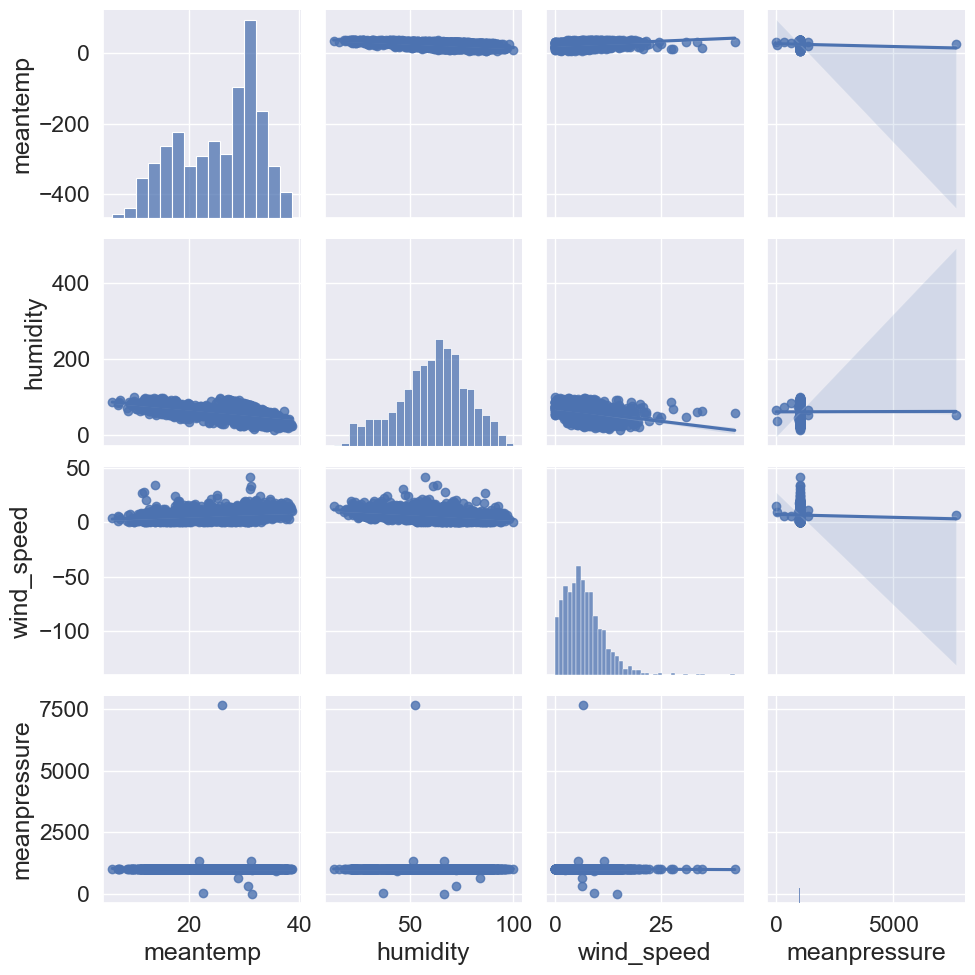

In [9]:
#Correlation pairplot of dataset:
sns.pairplot(df, kind='reg')

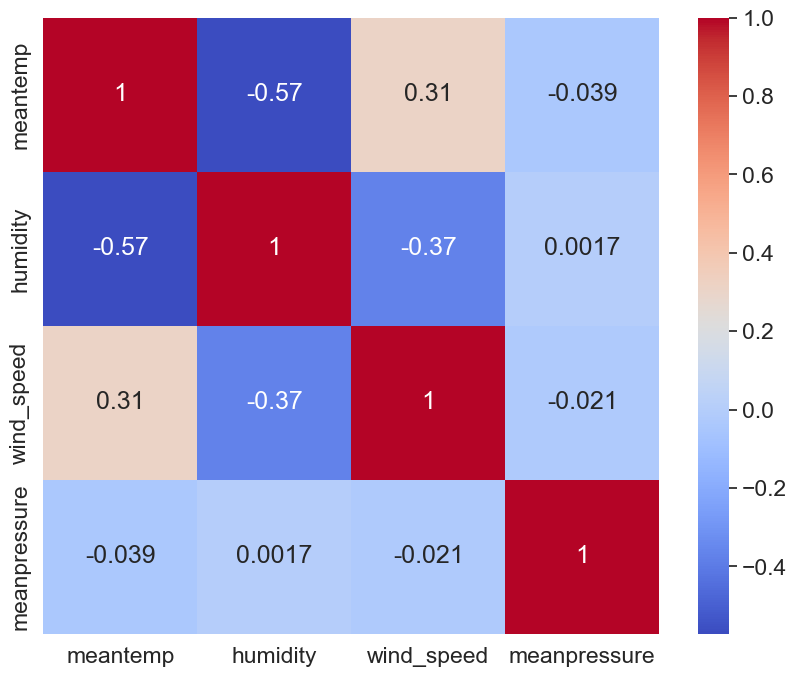

In [10]:
#Make a heatmap of correlation dataset:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.show()

In [11]:
#Scale the data with MinMaxScaler:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data and transform it
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321
2013-01-02,-2.463454,1.862828,-0.838196,0.037162
2013-01-03,-2.495219,1.564569,-0.475626,0.041972
2013-01-04,-2.291015,0.630022,-1.221233,0.033647
2013-01-05,-2.654044,1.554627,-0.680303,0.029946


In [12]:
df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-5.880689e-16
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-5.628829e+00
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-5.286224e-02
50%,3.020541e-01,1.105528e-01,-1.273107e-01,-1.410365e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,2.131517e-02
max,1.799551e+00,2.340044e+00,7.766988e+00,3.701076e+01


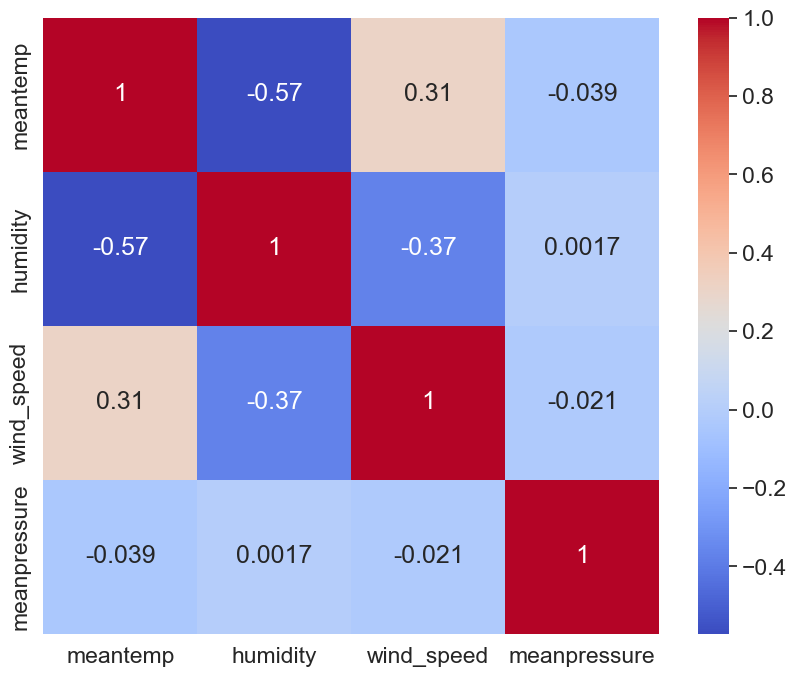

In [13]:
#Make a heatmap of correlation dataset:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.show()

In [14]:
#Make a line plot with plotly:
fig = px.line(df, x=df.index, y='meanpressure', color_discrete_sequence=['blue']) 
fig.show()

In [15]:
#Remove the outlier values in  2016-03-28 into the meanpressure column:
df.loc['2016-03-28', 'meanpressure'] = np.nan 
df['meanpressure'] = df['meanpressure'].interpolate(methods='time')
df.loc['2016-03-28']


meantemp          25.933333
humidity          52.800000
wind_speed         6.546667
meanpressure    1012.062500
Name: 2016-03-28 00:00:00, dtype: float64

In [16]:
#Add the column of year and month into the df_scaled:
df_scaled['Month'] = df_scaled.index.month
df_scaled['Year'] = df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,Month,Year
date,,,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321,1,2013
2013-01-02,-2.463454,1.862828,-0.838196,0.037162,1,2013
2013-01-03,-2.495219,1.564569,-0.475626,0.041972,1,2013
2013-01-04,-2.291015,0.630022,-1.221233,0.033647,1,2013
2013-01-05,-2.654044,1.554627,-0.680303,0.029946,1,2013


In [17]:
df_scaled.Year.unique()

array([2013, 2014, 2015, 2016, 2017])

<Axes: xlabel='Month', ylabel='meantemp'>

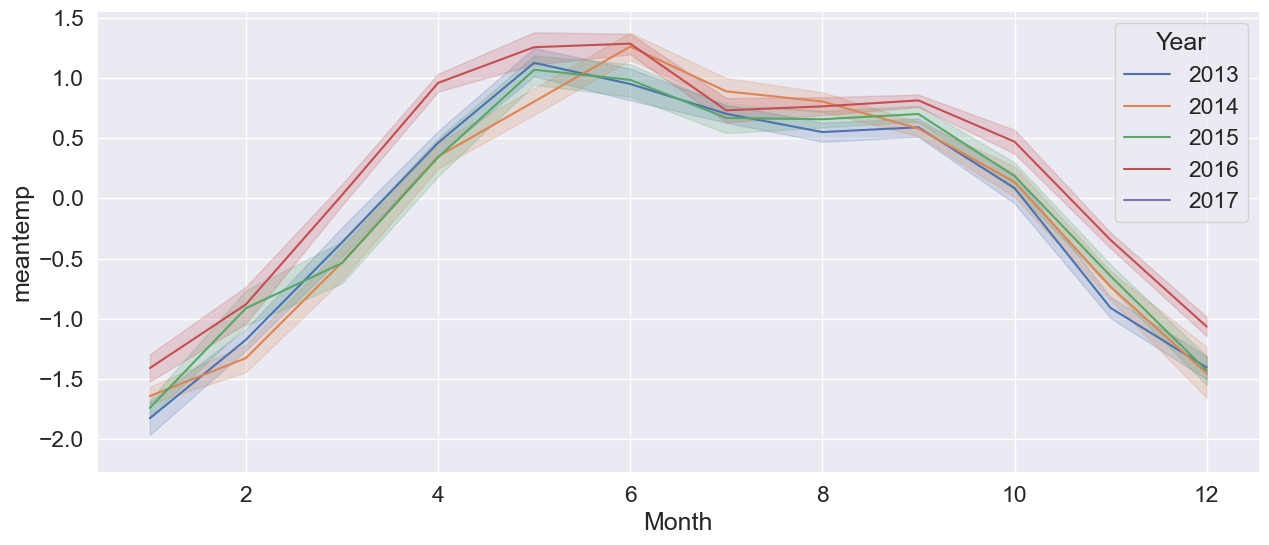

In [18]:
#Make a line plot of month and meantemp with sns:
sns.lineplot(df_scaled, x="Month", y="meantemp", hue='Year', palette="deep")


In [21]:
#Make the same plot in plotly with scaled data:
fig = px.line(df_scaled, x=df_scaled.index, y="meantemp", color="Year" ,title="Month and Temperature Relation")
fig.show()

In [22]:
#Data without scaling:
df['Month'] = df.index.month
df['Year'] = df.index.year
df.head()

,meantemp,humidity,wind_speed,meanpressure,Month,Year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


In [23]:
#Make the same plot in plotly:
fig = px.line(df, x=df.index, y="meantemp", color="Year" ,title="Month and Temperature Relation")
fig.show()

In [27]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [29]:
#rename the dataset
df = df.rename(columns={'date':'ds', "meantemp":"y"})
df.head()


,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [32]:
#Import the Prophet model:
from prophet import Prophet
from prophet.plot import plot_plotly , plot_components_plotly

#Call the model:
model = Prophet()
model.fit(df)
forecast = model.make_future_dataframe(periods=365)

08:32:44 - cmdstanpy - INFO - Chain [1] start processing
08:32:45 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
# predict the forecast:
forecast = model.predict(forecast)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.689997,9.203135,14.294854,24.689997,24.689997,-12.939197,-12.939197,-12.939197,0.034058,0.034058,0.034058,-12.973255,-12.973255,-12.973255,0.0,0.0,0.0,11.750800
1,2013-01-02,24.690142,9.410952,14.511195,24.690142,24.690142,-12.803590,-12.803590,-12.803590,0.146275,0.146275,0.146275,-12.949865,-12.949865,-12.949865,0.0,0.0,0.0,11.886552
2,2013-01-03,24.690287,9.379647,14.504514,24.690287,24.690287,-12.844073,-12.844073,-12.844073,0.067163,0.067163,0.067163,-12.911235,-12.911235,-12.911235,0.0,0.0,0.0,11.846214
3,2013-01-04,24.690432,9.260309,14.357485,24.690432,24.690432,-12.831776,-12.831776,-12.831776,0.027535,0.027535,0.027535,-12.859310,-12.859310,-12.859310,0.0,0.0,0.0,11.858656
4,2013-01-05,24.690577,9.294207,14.409218,24.690577,24.690577,-12.865204,-12.865204,-12.865204,-0.069124,-0.069124,-0.069124,-12.796081,-12.796081,-12.796081,0.0,0.0,0.0,11.825373


In [36]:
#Plot the model and forecast with plot_plotly:
fig = plot_plotly(model, forecast)
fig.show()